# Multidimensional Scaling (Kontinental Hockey League player Dataset)

####                                         Saheed Adisa GANIYU
####                                        Abdulkabir MUHAMMED, 
####                                              Baboucarr DIBBA,
####                                                Olubunmi ABU,
####                                       Ismail Usman ABDULLATEEF


###                          Supervisor: Dr Thomas Zurcher

###                                   Institute of Mathematics
###                   The University of Silesia in Katowice, Poland.


###                                                May 2021


#####  [GitHub](https://github.com/)
##### [DataSource](https://www.kaggle.com/kurzanovart/kontinental-hockey-league-player-statistics)
#### Data Context:
The Kontinental Hockey League (KHL) is an international professional ice hockey league founded in 2008. It comprises 24 member clubs based in Belarus, China, Finland, Latvia, Kazakhstan and Russia, and it is planned to expand to more countries.

***
#### Goodness-of-fit / loss function
As it is important to measure the goodness of fit any model, we make use of Kruskal stress thresholds in his 1964 paper to evaluate the quality of a MDS projection as it is given in the table below:

|Stress ($\sigma_{K}$)|Goodness-of-Fit|
|:-:|:-:|
|$\geq 0.200$| Poor|
|$\geq 0.100$| Fair|
|$\geq 0.050$| Good|
|$\geq 0.025$| Excellent|
|$0.000$| Perfect|


Here, we present metric MDS algorithm steps we are going to make use which is a bit different from Classical MDS as follows:

1. Compute $D$, an $k-by-k$ square matrix whose entries correspond to the Euclidean distances between any pair of observations (note that $D$ is symmetric and has a zeros diagonal);


2. Calculate $m$, a $k-by-1$ vector whose entries correspond to the weight of each observation (if all weights are equal, then $m_{i} = 1/k$);


3. Determine the centering matrix $C$ by $C = I - 1*m^{T}$, where $I$ is the identity matrix, $1$ is the unity vector, and $m^{T}$ is the transverse of $m$;


4. Calculate the cross-product matrix $S$, where $S = \frac{-1}{2}C*D*C^{T}$


5. Perform the eigendecomposition of $S$ so that the descending-ordered eigenvalues form the diagonal of a null matrix $\Lambda$ and the corresponding normalized eigenvectors are the columns of a matrix $U$;


6. Find the projected MDS coordinates in matrix $F$ by $F = M^{\frac{-1}{2}}*U*\Lambda^{\frac{1}{2}}$, where $M$ is the null matrix with $m$ as the main diagonal, $U$ is the normalized eigenvectors matrix, and $\Lambda$ is the null matrix with the eigenvalues as the main diagonal;


7. Plot the MDS coordinates into the selected number of dimensions; thus, to project an observation into a $2D$ Cartesian plane, take the values in the intersection between the observation's row and the first 2 columns and plot them in different orthogonal coordinates.

In [1]:
import numpy as np              
import pandas as pd                                 
from matplotlib import pyplot as plt                        
from sklearn.metrics import euclidean_distances               
import seaborn as sns                                   
from sklearn.manifold import MDS


### Data Reading

In [2]:
df = pd.read_csv('khl_2018-2019.csv', sep=',')
df.head(13)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
0,0,Аалтонен Миро,ВИТ,61,19,23,42,9,165,11.5,20,17:39,F
1,1,Аверин Егор,ЛОК,57,13,14,27,15,102,12.7,10,16:18,F
2,2,Авцин Александр,НХК,20,1,2,3,1,24,4.2,8,11:18,F
3,3,Азеведо Джастин,АКБ,62,13,24,37,26,195,6.7,42,16:49,F
4,4,Акмальдинов Александр,СОЧ,30,1,6,7,-3,24,4.2,11,08:30,F
5,5,Акользин Павел,БАР,59,7,8,15,-4,96,7.3,33,12:13,F
6,6,Алексеев Андрей,ДИН,29,7,6,13,0,51,13.7,14,13:54,F
7,7,Алексеев Денис,ЛОК,59,10,19,29,6,84,11.9,16,14:45,F
8,8,Алтыбармакян Андрей,СОЧ,38,2,4,6,-4,26,7.7,14,09:35,F
9,9,Андронов Сергей,ЦСК,48,8,3,11,14,88,9.1,16,14:49,F


Checking the Sumarry of the data

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,811.0,405.000000,234.259827,0.0,202.5,405.0,607.5,810.0
games,811.0,36.633785,19.322929,1.0,21.0,41.0,54.0,62.0
goals,811.0,4.663379,5.511727,0.0,1.0,3.0,7.0,29.0
assists,811.0,7.090012,7.681502,0.0,1.0,5.0,11.0,64.0
points,811.0,11.748459,12.398162,0.0,2.0,8.0,17.0,81.0
pl_min,811.0,-0.200986,9.491792,-29.0,-5.0,-1.0,3.0,47.0
shoots,811.0,55.694205,46.586971,0.0,18.0,45.0,84.0,253.0
per_shoots,811.0,6.787793,6.857332,0.0,1.2,5.9,10.4,100.0
penalty_time,811.0,18.046856,17.670378,0.0,6.0,14.0,26.0,114.0


#### Standardizing
We will standardize each feature to obtain standard normal distributions (Gaussian):

In [4]:
# Recall: standardized value = (original value - mean)/(standard deviation)

df['games'] = (df['games'] - df['games'].mean())/df['games'].std()

df['goals'] = (df['goals'] - df['goals'].mean())/df['goals'].std()

df['assists'] = (df['assists'] - df['assists'].mean())/df['assists'].std()

df['points'] = (df['points'] - df['points'].mean())/df['points'].std()

df['points'] = (df['points'] - df['points'].mean())/df['points'].std()

df['pl_min'] = (df['pl_min'] - df['pl_min'].mean())/df['pl_min'].std()

df['shoots'] = (df['shoots'] - df['shoots'].mean())/df['shoots'].std()

df['per_shoots'] = (df['per_shoots'] - df['per_shoots'].mean())/df['per_shoots'].std()

df

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
0,0,Аалтонен Миро,ВИТ,1.261000,2.601112,2.071208,2.440002,0.969362,2.346274,0.687178,20,17:39,F
1,1,Аверин Егор,ЛОК,1.053992,1.512524,0.899562,1.230145,1.601487,0.993964,0.862173,10,16:18,F
2,2,Авцин Александр,НХК,-0.860831,-0.664652,-0.662632,-0.705625,0.126529,-0.680323,-0.377376,8,11:18,F
3,3,Азеведо Джастин,АКБ,1.312752,1.512524,2.201391,2.036716,2.760383,2.990231,-0.012803,42,16:49,F
4,4,Акмальдинов Александр,СОЧ,-0.343312,-0.664652,-0.141901,-0.382997,-0.294888,-0.680323,-0.377376,11,08:30,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,806,Юдин Дмитрий,АКБ,-0.239808,-0.846083,-0.532450,-0.705625,-0.084179,-0.336880,-0.989859,24,17:53,D
807,807,Юйэнь Зак,КУН,-0.084552,-0.664652,-0.792815,-0.786283,-1.243075,-0.852045,-0.071134,41,10:54,D
808,808,Яношик Адам,СЛВ,1.002240,-0.664652,-0.402267,-0.544311,-2.507326,0.264147,-0.771115,32,14:54,D
809,809,Ярвинен Йоонас,КУН,0.122456,-0.483220,-0.272084,-0.382997,0.442591,-0.057832,-0.435708,30,19:30,D


Here, we categorize and sort players based on their goal difference for the sake of vissualization 

In [5]:
bins = [-1, 1, 3, 7, 15]
labels = ['low', 'med', 'high', 'vhigh']
df['goal_cat'] = pd.cut(df['goals'], bins=bins, labels=labels)
df.head()
dpalette = sns.color_palette("rocket_r",n_colors = 4)
palette = sns.color_palette("rocket")
df=df.sort_values(by="goal_cat")
df.to_csv('file1.csv')

The following shows the distributions with a martix scatter plot from the Seaborn package.

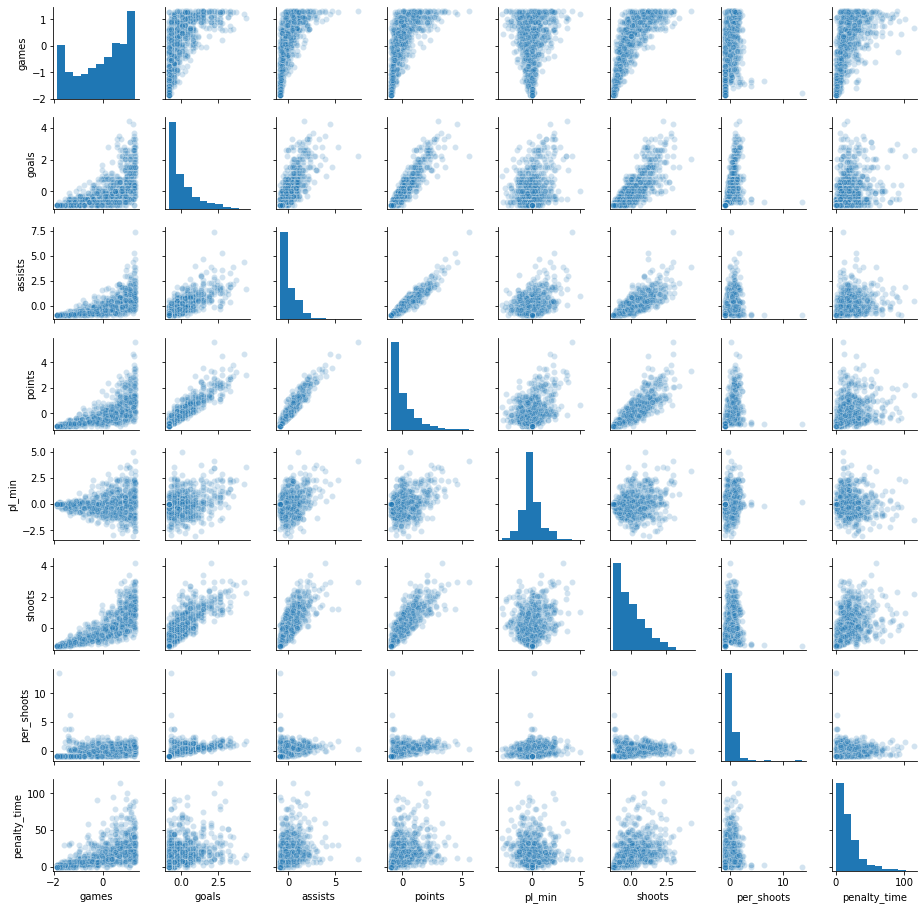

In [6]:
sns.pairplot(df,vars=['games','goals','assists','points','pl_min','shoots','per_shoots','penalty_time'],markers='o',plot_kws={'alpha': 0.2})
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.6, top=0.6, wspace=0.3, hspace=0.2)
plt.show()

 
### Execution of the given algorithm
Now, we start executing each steps of the above listed algorithm one next to each other as follow:

#### Compute $D = $ Euclidean Distance Matrix


In [7]:
def EDM(A,B):                                                #function to compute Euclidean distance matrix
    '''The Function compute Euclidean distance matrix
    Prameters: Matrix A(nxm) and Mattrix B(nxm)
    Returns (Matrix) Euclidean distance Matrix
    '''
    p1 = np.sum(A**2, axis=1)[:, np.newaxis]
    p2 = np.sum(B**2, axis=1)
    p3= -2*np.dot(A,B.T)
    return np.round(np.sqrt(np.abs(p1 + p2 + p3)),4)



player = df['player'].to_numpy()                                            # retaining the player names in np.array
team = df['team'].to_numpy()
df_2 = df.drop(labels=['player','team', 'position', 'Unnamed: 0','avr_time_on_ice','goal_cat'],axis=1)   #removing non-numerical colums for EDM
df_2 = df_2.to_numpy(dtype=np.double)
D = EDM(df_2,df_2)
#D = euclidean_distances(df_2,df_2)
print('First row of D is:\n',D[0,:])
print('\nFirst column of D is:\n',D[:,0]) 

First row of D is:
 [ 0.     30.3073 22.338  28.3798  5.1837 26.2069 24.2505 30.3847  3.6497
 28.399  28.4119 28.3839 12.6512 22.3552 30.353  14.3027 16.1497  4.927
  4.3242 28.4195 18.1107 28.3367 24.4636  5.1183 22.1784  5.7361  2.9063
 12.3811 14.326   6.1848 30.3814 28.3946  4.8021 30.3833 22.272  28.3857
  2.3968 14.5089 16.2275  8.4147 18.4081 25.0874 26.2938 12.4121  5.6341
 28.4122 24.4947 16.4165  5.1202 30.3675 28.3341 16.3079 16.4904 24.3325
 20.3454 18.434  24.3143 30.2759 28.3587 27.1169 12.4326 22.2512  8.1949
 18.4803  7.0224 28.3704  4.1804 16.462  26.2616 26.2448 10.119  30.6056
  3.0618 26.2481 30.2767 14.3782  8.867  30.3798 19.1596 28.0614 10.5951
 22.3343  8.5295 24.2873 28.3431 24.38   18.2544  8.6057 30.3795 14.4862
  6.0197 52.1224 12.5054 15.5208 16.097  28.388  30.3868  6.414   5.3952
 16.3497 14.0974  7.3253 26.2929 20.5497 26.4144 24.2875 22.4503 20.261
 17.456  17.3318 16.3662 14.5276 30.378  24.1725 18.1401 24.2657 19.3987
 10.4926  3.3552 26.2934 22.0203 

The above printed row and column verifies that Euclidean Distance Matrix is indeed symmetric.

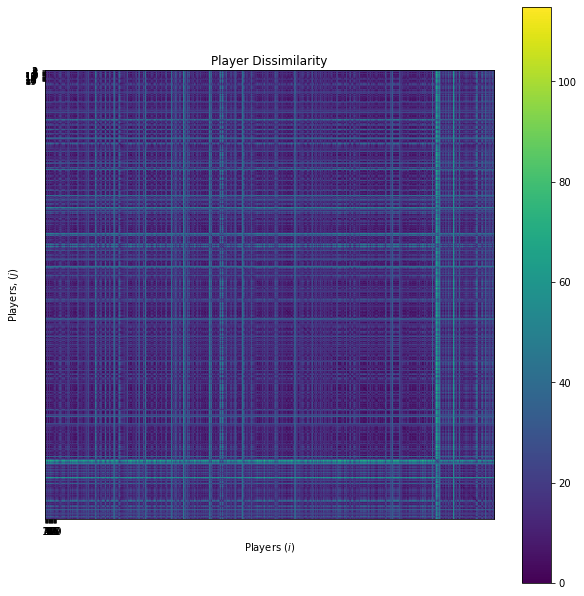

In [8]:
plt.imshow(D)
plt.title('Player Dissimilarity'); plt.xlabel('Players ($i$)'); plt.ylabel('Players, ($j$)');
plt.xticks(np.linspace(0,19,20),np.arange(1,21,1)); plt.yticks(np.linspace(0,19,20),np.arange(1,20,1)); plt.colorbar()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.3, top=2.0, wspace=0.5, hspace=0.3) 

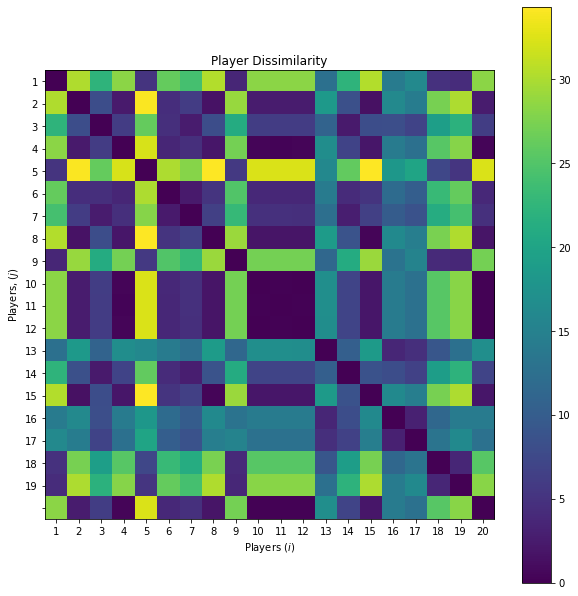

In [9]:
plt.imshow(D[0:20,0:20])
plt.title('Player Dissimilarity'); plt.xlabel('Players ($i$)'); plt.ylabel('Players, ($j$)');
plt.xticks(np.linspace(0,19,20),np.arange(1,21,1)); plt.yticks(np.linspace(0,19,20),np.arange(1,20,1)); plt.colorbar()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.3, top=2.0, wspace=0.5, hspace=0.3) 

For clarity, we plot for the first 21 rows and first 21 columns

#### Computing $m$
i.e. a 𝑘−𝑏𝑦−1 vector whose entries correspond to the weight of each observation

In [10]:
m = np.ones(shape=(len(D),1))*(1/len(D))
print('City weights, m = ' + str(np.matrix.transpose(m)) + '.')
print('Sum of the data sample weights = ' + str(round(np.sum(m),2)) + '.')

City weights, m = [[0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.00123305 0.00123305 0.00123305 0.00123305
  0.00123305 0.00123305 0.0012

#### Computin centering matrix $C$


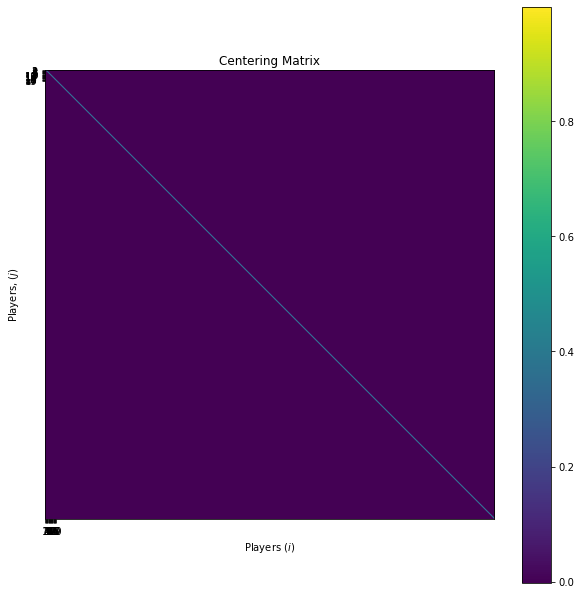

In [11]:
C = np.identity(n=len(m)) - np.full(shape=(len(m),len(m)),fill_value=m)
plt.imshow(C)
plt.title('Centering Matrix'); plt.xlabel('Players ($i$)'); plt.ylabel('Players, ($j$)');
plt.xticks(np.linspace(0,19,20),np.arange(1,21,1)); plt.yticks(np.linspace(0,19,20),np.arange(1,20,1));
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.3, top=2.0, wspace=0.5, hspace=0.3); plt.colorbar()

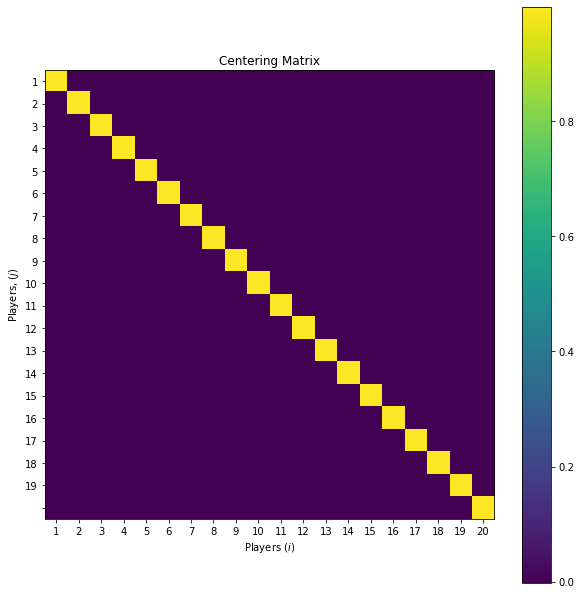

In [12]:
plt.imshow(C[0:20,0:20])
plt.title('Centering Matrix'); plt.xlabel('Players ($i$)'); plt.ylabel('Players, ($j$)');
plt.xticks(np.linspace(0,19,20),np.arange(1,21,1)); plt.yticks(np.linspace(0,19,20),np.arange(1,20,1));
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.3, top=2.0, wspace=0.5, hspace=0.3); plt.colorbar()

For clarity or closed view, we plot for the first 21 rows and firt 21 columns

#### Calculate cross-product matrix $S$
i.e. $S = \frac{-1}{2}C*D*C^{T}$

In [13]:
C = np.identity(n=len(m)) - np.full(shape=(len(m),len(m)),fill_value=m)
S = -0.5*np.matmul(C,np.matmul(D,np.transpose(C)))
print(S)

[[ 9.60753237 -5.75379279 -4.02059415 ... -3.06161153 -0.92400672
   0.06229371]
 [-5.75379279  9.19218206  2.8923307  ...  2.47566331 -0.50423188
  -1.40348145]
 [-4.02059415  2.8923307   4.68927934 ...  1.88276196  0.35226677
  -0.3379828 ]
 ...
 [-3.06161153  2.47566331  1.88276196 ...  6.84124457  2.99844938
   2.03769981]
 [-0.92400672 -0.50423188  0.35226677 ...  2.99844938  5.46735419
   4.30750462]
 [ 0.06229371 -1.40348145 -0.3379828  ...  2.03769981  4.30750462
   5.49845505]]


#### Computin the eigendecomposition of $S$

In [14]:
eigen = np.linalg.eig(S)
print('Eigenvalues are:\n',eigen[0])

Eigenvalues are:
 [ 3.85175537e+03+0.00000000e+00j  1.20109123e+03+0.00000000e+00j
  5.30667871e+02+0.00000000e+00j  2.95861482e+02+0.00000000e+00j
  1.88875747e+02+0.00000000e+00j  1.27025601e+02+0.00000000e+00j
  1.13991003e+02+0.00000000e+00j  8.45831714e+01+0.00000000e+00j
  5.72946337e+01+0.00000000e+00j  5.22526263e+01+0.00000000e+00j
  4.52813043e+01+0.00000000e+00j  3.90420560e+01+0.00000000e+00j
  3.64621579e+01+0.00000000e+00j  3.62723109e+01+0.00000000e+00j
  3.12956839e+01+0.00000000e+00j  2.62416777e+01+0.00000000e+00j
  2.31075374e+01+0.00000000e+00j  2.23894298e+01+0.00000000e+00j
  1.94219293e+01+0.00000000e+00j  1.80316525e+01+0.00000000e+00j
  1.78785573e+01+0.00000000e+00j  1.57384055e+01+0.00000000e+00j
  1.53962179e+01+0.00000000e+00j  1.41879646e+01+0.00000000e+00j
  1.32766023e+01+0.00000000e+00j  1.27758335e+01+0.00000000e+00j
  1.19628699e+01+0.00000000e+00j  1.13619142e+01+0.00000000e+00j
  1.09771396e+01+0.00000000e+00j  1.05489300e+01+0.00000000e+00j
  9.699

In [15]:
len(eigen[0])

811

The printed array shows that $S$ has 811 eigenvalues where some of the last values is equivalent to zero due number precision. So, we can set them to zero for computational reason...

In [16]:
U = eigen[1]

Lambda = np.where(eigen[0]<=0,0,eigen[0])
print('Eigenvalues are:\n',Lambda)

Eigenvalues are:
 [3.85175537e+03+0.00000000e+00j 1.20109123e+03+0.00000000e+00j
 5.30667871e+02+0.00000000e+00j 2.95861482e+02+0.00000000e+00j
 1.88875747e+02+0.00000000e+00j 1.27025601e+02+0.00000000e+00j
 1.13991003e+02+0.00000000e+00j 8.45831714e+01+0.00000000e+00j
 5.72946337e+01+0.00000000e+00j 5.22526263e+01+0.00000000e+00j
 4.52813043e+01+0.00000000e+00j 3.90420560e+01+0.00000000e+00j
 3.64621579e+01+0.00000000e+00j 3.62723109e+01+0.00000000e+00j
 3.12956839e+01+0.00000000e+00j 2.62416777e+01+0.00000000e+00j
 2.31075374e+01+0.00000000e+00j 2.23894298e+01+0.00000000e+00j
 1.94219293e+01+0.00000000e+00j 1.80316525e+01+0.00000000e+00j
 1.78785573e+01+0.00000000e+00j 1.57384055e+01+0.00000000e+00j
 1.53962179e+01+0.00000000e+00j 1.41879646e+01+0.00000000e+00j
 1.32766023e+01+0.00000000e+00j 1.27758335e+01+0.00000000e+00j
 1.19628699e+01+0.00000000e+00j 1.13619142e+01+0.00000000e+00j
 1.09771396e+01+0.00000000e+00j 1.05489300e+01+0.00000000e+00j
 9.69999262e+00+0.00000000e+00j 9.598

#### Find the projected MDS coordinates in matrix $F$
i.e. $F = M^{\frac{-1}{2}}*U*\Lambda^{\frac{1}{2}}$, where $M$ is the null matrix with $m$ as the main diagonal, $U$ is the normalized eigenvectors matrix, and $\Lambda$ is the null matrix with the eigenvalues as the main diagonal;

In [21]:
#scores = np.matmul(np.sqrt(np.linalg.inv(np.diag(m[:,0]))),np.matmul(U,np.sqrt(np.diag(Lambda))))
n_components = 2                                                                 # MDS projection dimensionality
embedding = MDS(n_components=2, random_state=20348, dissimilarity="precomputed", n_jobs=1)
scores = embedding.fit_transform(D)


#### Plot the MDS coordinates
Lastly, we plot our first two MDS coordinates against each other which comprises of 8 features and 811 observation

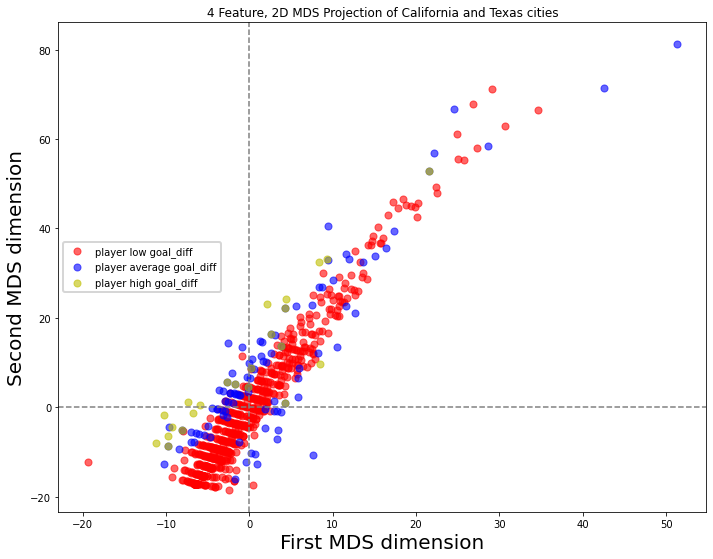

In [22]:
x_proj = scores[:,0]
y_proj = scores[:,1]

fig1 = plt.figure()
plt.scatter(x_proj[0:701],y_proj[0:701], color='r', label='player low goal_diff',s=50,alpha=0.6)
plt.scatter(x_proj[701:798],y_proj[701:798], color='b', label='player average goal_diff',s=50,alpha=0.6)
plt.scatter(x_proj[788:811],y_proj[788:811], color='y', label='player high goal_diff',s=50,alpha=0.6)

#for i, txt in enumerate(player):
#   plt.annotate(txt, (x_proj[i]+0.05, y_proj[i]+0.1), size=12, style='italic')

plt.title('4 Feature, 2D MDS Projection of California and Texas cities')
plt.xlabel('First MDS dimension',size=20)
plt.ylabel('Second MDS dimension',size=20)
plt.axvline(0, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')
legend = plt.legend(loc = 'center left'); legend.get_frame().set_linewidth(2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.5, hspace=0.3)
plt.show()

### Interpretation....
Here....
***

**Note:** It is possible to print each player's name on each observation in the plot but it gets messy with it. So, we decide to remome them.

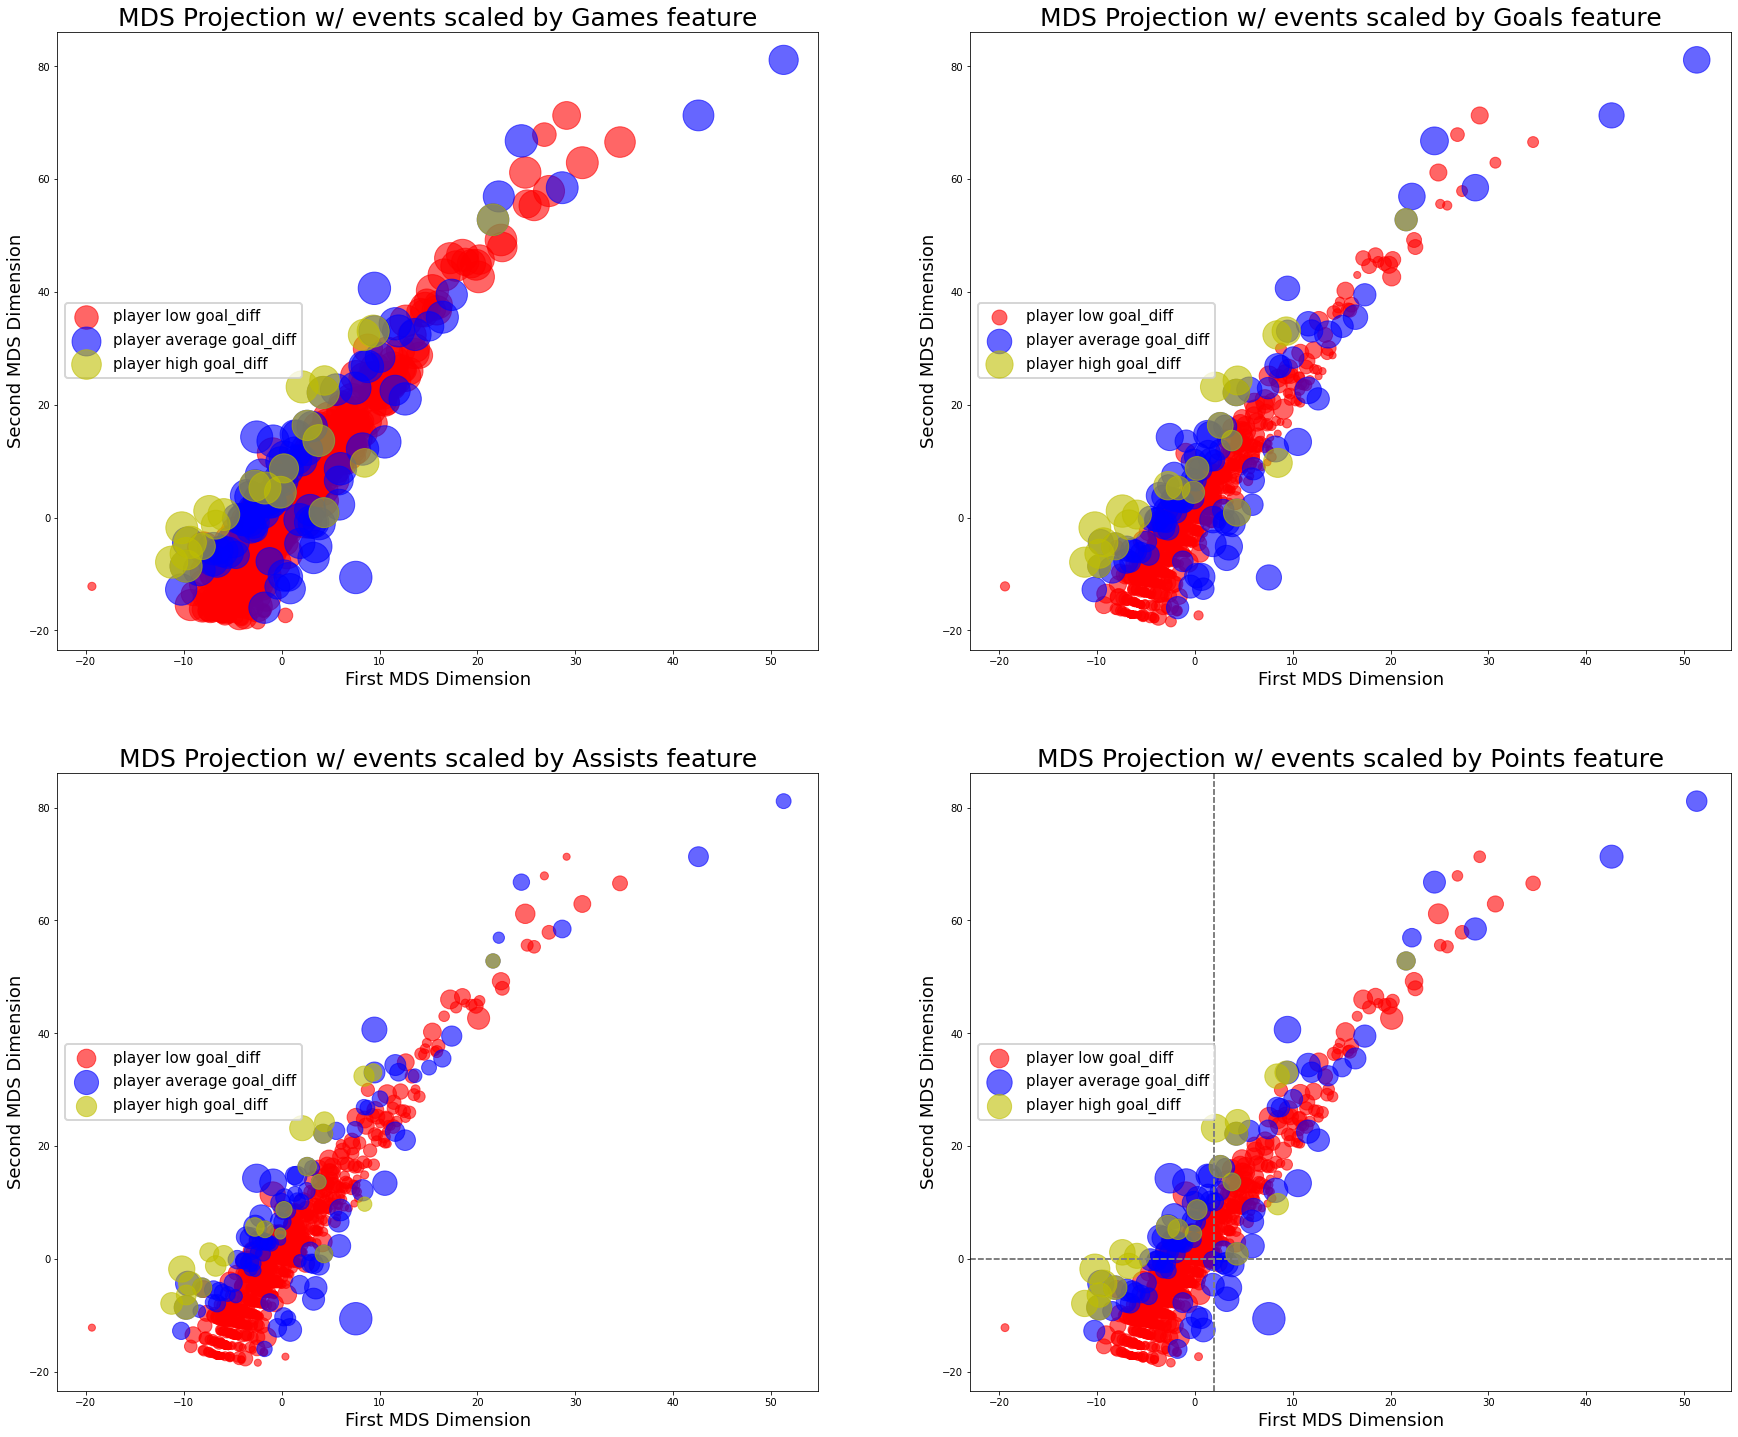

In [23]:
fig, [[sct1, sct2], [sct3, sct4]] = plt.subplots(2,2,figsize=(30,25))
X = df_2
# Normalizing feature observations to 0-1 range 
s1 = (X[:,0] - min(X[:,0]))/(max(X[:,0] - min(X[:,0])))+0.05
s2 = (X[:,1] - min(X[:,1]))/(max(X[:,1] - min(X[:,1])))+0.05
s3 = (X[:,2] - min(X[:,2]))/(max(X[:,2] - min(X[:,2])))+0.05
s4 = (X[:,3] - min(X[:,3]))/(max(X[:,3] - min(X[:,3])))+0.05

# MDS scaled by games feature
sct1.scatter(x_proj[0:701],y_proj[0:701],s=1000*s1[0:701],label='player low goal_diff',color='red',alpha=0.6)
sct1.scatter(x_proj[701:798],y_proj[701:798],s=1000*s1[701:798],label='player average goal_diff',color='blue',alpha=0.6)
sct1.scatter(x_proj[788:811],y_proj[788:811],s=1000*s1[788:811],label='player high goal_diff',color='y',alpha=0.6)
plt.axvline(2, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')
sct1.set_title('MDS Projection w/ events scaled by Games feature',size=25)
sct1.set_xlabel('First MDS Dimension',size=18)
sct1.set_ylabel('Second MDS Dimension',size=18)
legend = sct1.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# MDS scaled by goals feature
sct2.scatter(x_proj[0:701],y_proj[0:701],s=1000*s2[0:701],label='player low goal_diff',color='red',alpha=0.6)
sct2.scatter(x_proj[701:798],y_proj[701:798],s=1000*s2[701:798],label='player average goal_diff',color='blue',alpha=0.6)
sct2.scatter(x_proj[788:811],y_proj[788:811],s=1000*s2[788:811],label='player high goal_diff',color='y',alpha=0.6)
plt.axvline(2, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')
sct2.set_title('MDS Projection w/ events scaled by Goals feature',size=25)
sct2.set_xlabel('First MDS Dimension',size=18)
sct2.set_ylabel('Second MDS Dimension',size=18)
legend = sct2.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# MDS scaled by assists feature
sct3.scatter(x_proj[0:701],y_proj[0:701],s=1000*s3[0:701],label='player low goal_diff',color='red',alpha=0.6)
sct3.scatter(x_proj[701:798],y_proj[701:798],s=1000*s3[701:798],label='player average goal_diff',color='blue',alpha=0.6)
sct3.scatter(x_proj[788:811],y_proj[788:811],s=1000*s3[788:811],label='player high goal_diff',color='y',alpha=0.6)
plt.axvline(2, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')
sct3.set_title('MDS Projection w/ events scaled by Assists feature',size=25)
sct3.set_xlabel('First MDS Dimension',size=18)
sct3.set_ylabel('Second MDS Dimension',size=18)
legend = sct3.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# MDS scaled by points feature
sct4.scatter(x_proj[0:701],y_proj[0:701],s=1000*s4[0:701],label='player low goal_diff',color='red',alpha=0.6)
sct4.scatter(x_proj[701:798],y_proj[701:798],s=1000*s4[701:798],label='player average goal_diff',color='blue',alpha=0.6)
sct4.scatter(x_proj[788:811],y_proj[788:811],s=1000*s4[788:811],label='player high goal_diff',color='y',alpha=0.6)
#plt.axvline(2, c=(.5, .5, .5), ls='--')
#plt.axhline(0, c=(.5, .5, .5), ls='--')
sct4.set_title('MDS Projection w/ events scaled by Points feature',size=25)
sct4.set_xlabel('First MDS Dimension',size=18)
sct4.set_ylabel('Second MDS Dimension',size=18)
legend = sct4.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# Add name tags to cities
#for i,txt in enumerate(team):
#    sct1.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')
#    sct2.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')
#    sct3.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')
#    sct4.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')

### Kruskal Stress 
By following the given formula of the Stress, we compute the stress as follow:

In [36]:
proj_dists = np.zeros(shape=(np.shape(D)))

for i in range(len(D)):
    for j in range(len(D)):
        if i==j:
            continue                                                
        else:
            proj_dists[i,j] = np.sqrt((scores[j,0]-scores[i,0])**2 + (scores[j,1]-scores[i,1])**2)        # Euclidean distance

num = 0; den = 0                        

for i in range(len(D)):                             
    for j in range(len(D)):                             
        if i==j:
            continue
        else:
            num += (proj_dists[i,j] - D[i,j])**2
            den += (D[i,j])**2
            
stress = np.sqrt(num/den)
print('Kruskal First Stress is: ',stress)

Kruskal First Stress is:  0.020586570524501142


By checking the threshold values set by Kruskal, this metric MDS projection falls to **excellent** class

Here, we employ another means to decide if the projection is accurate by ploting the projected pairwise distances (i.e. *proj_dists*) against the original pairwise distances (i.e. *D*) in a scatter plot. A null stress projection would make the scattered data exhibit linear behavior (i.e. $y=x$ line)

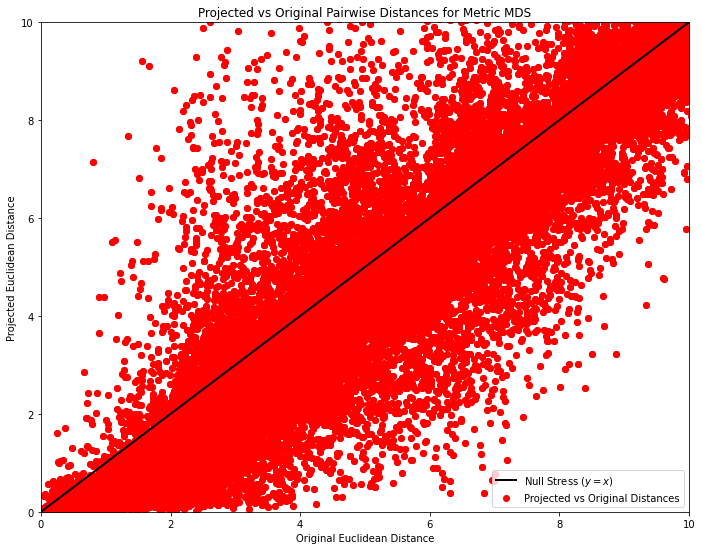

In [37]:
plt.scatter(D,proj_dists,label='Projected vs Original Distances',color='red')
plt.plot(2*np.max(D)*np.array([0,1]),2*np.max(D)*np.array([0,1]),color='black',linewidth=2,label=r'Null Stress ($y=x$)')

plt.title('Projected vs Original Pairwise Distances for Metric MDS');
plt.xlabel('Original Euclidean Distance',color='black'); plt.xlim([0,10]); plt.ylim([0,10])
plt.ylabel('Projected Euclidean Distance',color='black');
plt.legend(loc='lower right');
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.5, hspace=0.3)

The data in the scatter plot exhibit somewhat linear behavior, which is also about the null stress line $y=x$ (sign of goodness fit but not perfect). The more the data moves away from the null stress line, the less preserved are the original dissimilarities between events in higher-dimensional space.

### sklearn.manifold.MDS
To check our implementation result, we make use of Sklearn library having MDS methods by comparing its *non-metric* method with our implemented *Metric* method.

In [38]:
n_components = 2                                                                 # MDS projection dimensionality

embedding = MDS(n_components=2, metric=False, dissimilarity="precomputed", random_state=20348, n_jobs=1, n_init=1)  # dissimilarity parameter shows D is already known
nm_scores = embedding.fit_transform(D)

np.shape(nm_scores)

(811, 2)

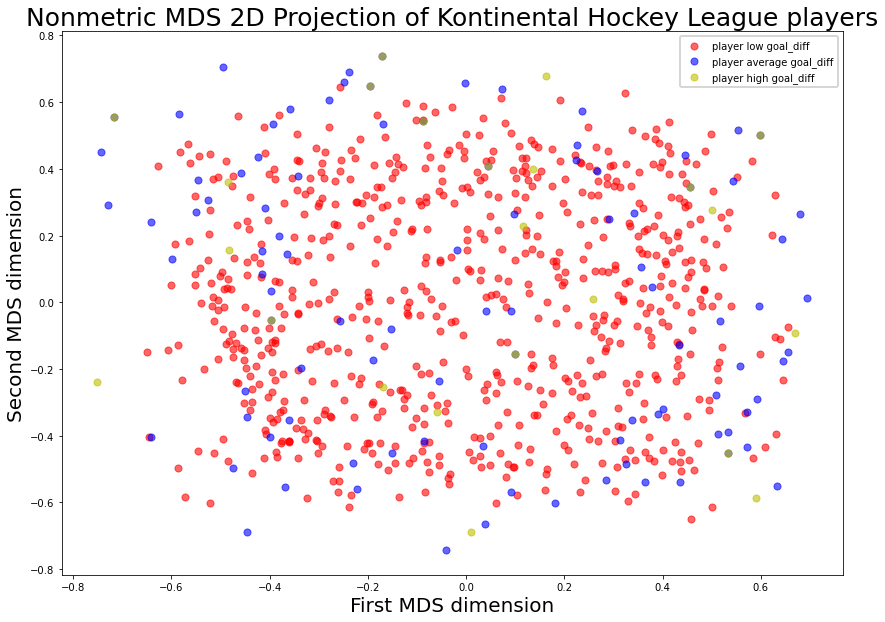

In [47]:
nm_x_proj = nm_scores[:,0]
nm_y_proj = nm_scores[:,1]

plt.figure(figsize=(14,10))
plt.scatter(nm_x_proj[0:701],nm_y_proj[0:701], color='r', label='player low goal_diff',s=50,alpha=0.6)
plt.scatter(nm_x_proj[701:798],nm_y_proj[701:798], color='b', label='player average goal_diff',s=50,alpha=0.6)
plt.scatter(nm_x_proj[788:811],nm_y_proj[788:811], color='y', label='player high goal_diff',s=50,alpha=0.6)


#for i, txt in enumerate(team):
#    plt.annotate(txt, (nm_x_proj[i], nm_y_proj[i]), size=15, style='italic')

plt.title('Nonmetric MDS 2D Projection of Kontinental Hockey League players',size=25)
plt.xlabel('First MDS dimension',size=20)
plt.ylabel('Second MDS dimension',size=20)
legend = plt.legend(); legend.get_frame().set_linewidth(2)
plt.show()

From the above nonmetric plot above, the first and second MDS dimension spreads between -0.8 to 0.8 on both axis which is actually smaller to the spread of metric.

Here, we plot the nonmetric and metric MDS together for easy visualization of how they spread within each other with some rotation on them.

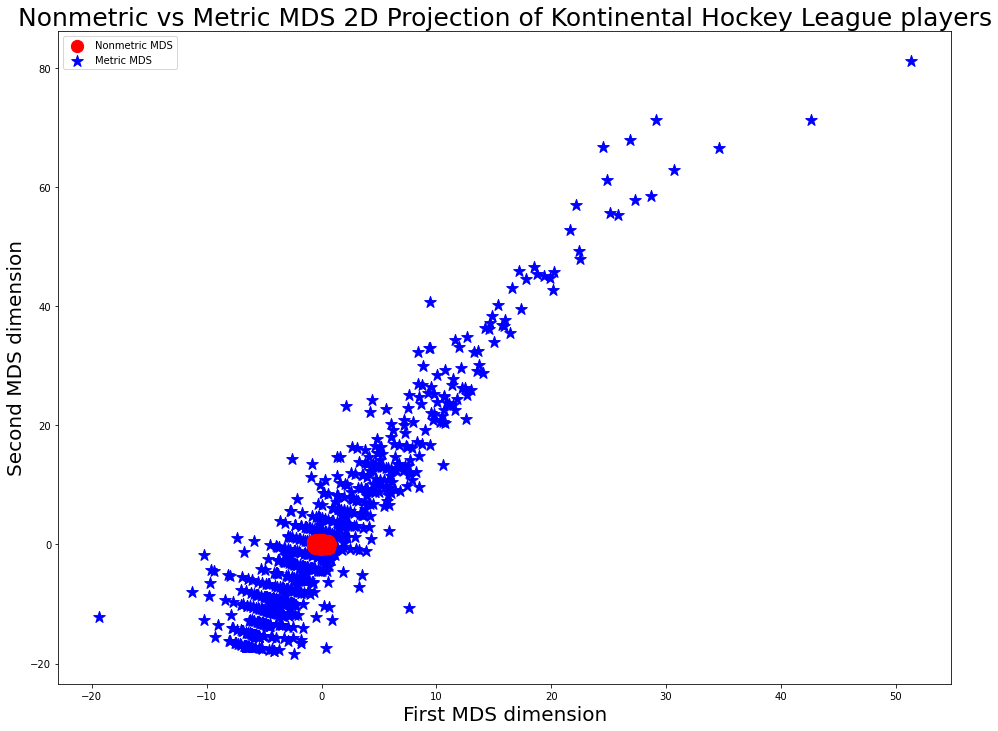

In [45]:
plt.figure(figsize=(16,12))

nm_scores = np.matmul(nm_scores,np.array([[0,-1],[1,0]]))       # Rotate nonmetric projection by 90 degrees clockwise
nm_x_proj = nm_scores[:,0]; nm_y_proj = nm_scores[:,1]

for i, txt in enumerate(team):
    plt.scatter(nm_x_proj[i],nm_y_proj[i], color='red', marker='o',s=150)    # Plot nonmetric MDS
    plt.scatter(x_proj[i],y_proj[i], color='b', marker='*',s=150)           # Plot metric MDS
#    plt.annotate(txt, (nm_x_proj[i], nm_y_proj[i]), size=12, style='italic')
#    plt.annotate(txt, (x_proj[i], y_proj[i]), size=12, style='italic')
    
plt.title('Nonmetric vs Metric MDS 2D Projection of Kontinental Hockey League players',size=25);
plt.xlabel('First MDS dimension',size=20);
plt.ylabel('Second MDS dimension',size=20);
plt.legend(('Nonmetric MDS', 'Metric MDS'));

The above plot gives the clear picture of how smaller spread portion of nonmetric MDS to metric MDS.
Concerning rotation, from the theory section, it has been mentioned that Metric MDS is invariant under rotation and translation but Nonmetric is variant but it is hardly to observe due to its nature of spread (kind of circle spread) in our case.

In [41]:
nm_proj_dists = np.zeros(shape=(np.shape(D)))

for i in range(len(D)):
    for j in range(len(D)):
        if i==j:
            continue                                                               
        else:
            nm_proj_dists[i,j] = np.sqrt((nm_scores[j,0]-nm_scores[i,0])**2 + \
                                         (nm_scores[j,1]-nm_scores[i,1])**2)       
            
num = 0; den = 0                                                                   

for i in range(len(D)):                                                           
    for j in range(len(D)):                                                        
        if i==j:
            continue
        else:
            num += (nm_proj_dists[i,j] - D[i,j])**2
            den += (D[i,j])**2
            
stress = np.sqrt(num/den)
print('Kruskal First Stress is: ',stress)

Kruskal First Stress is:  0.9819188502677242


And the projected pairwise distances against the original pairwise distances scatter plot:

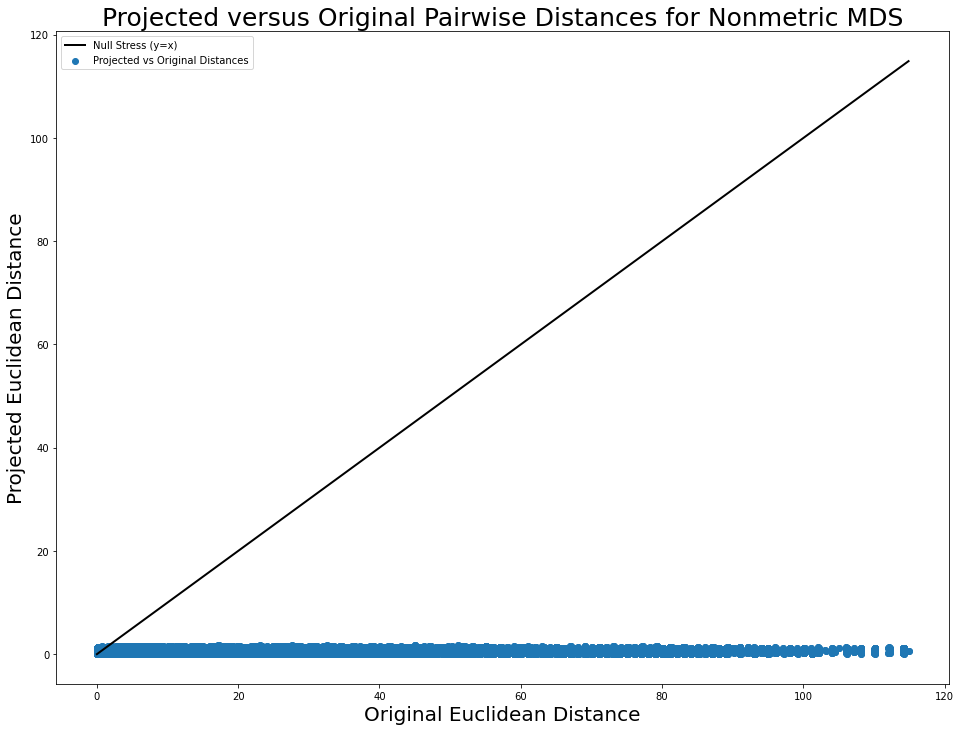

In [42]:
plt.figure(figsize=(16,12))

plt.scatter(D,nm_proj_dists,label='Projected vs Original Distances')
plt.plot(np.max(D)*np.array([0,1]),np.max(D)*np.array([0,1]),color='black',linewidth=2,label='Null Stress (y=x)')

plt.title('Projected versus Original Pairwise Distances for Nonmetric MDS',size=25);
plt.xlabel('Original Euclidean Distance',size=20);
plt.ylabel('Projected Euclidean Distance',size=20);
plt.legend();

The linear trend here formed by the projected versus original pairwise distances is clear. It is obvious that this is poor fit (above calculated Stress says it all), also the linear trend about $y=x$ attests to the fact that the nonmetric MDS projection did not preserves the dissimilarity unlike Metric does in our case. But, this is not all cases, Non-Metric perform better than Metric sometimes. i.e. The more the data moves away from the null stress line, the less preserved are the original dissimilarities between events in higher-dimensional space.